<a href="https://colab.research.google.com/github/arlianisarumy/Clickbait-Detection-Using-FastText/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install openpyxl

In [ ]:
!wget https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataNlpTm.py
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_id.txt
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/stopwords_en.txt
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/kata_dasar.txt
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-ind-def.tab
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/wn-msa-all.tab
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/ind_SA.csv
!wget -P data/ https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/all_indo_man_tag_corpus_model.crf.tagger

!pip install spacy python-crfsuite unidecode textblob sastrawi
!python -m spacy download xx
!python -m spacy download en_core_web_sm

--2023-08-11 10:52:08--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/taudataNlpTm.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14001 (14K) [text/plain]
Saving to: ‘taudataNlpTm.py’

taudataNlpTm.py     100%[===================>]  13.67K  --.-KB/s    in 0s      

2023-08-11 10:52:08 (63.2 MB/s) - ‘taudataNlpTm.py’ saved [14001/14001]

--2023-08-11 10:52:08--  https://raw.githubusercontent.com/taudata-indonesia/eLearning/master/data/slang.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29041 (28K) 

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
%matplotlib inline
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from spacy.lang.id import Indonesian
import re
from collections import Counter
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/skripsi_arum/data/datafix_eda.csv')

In [ ]:
df.head()

,title,source,category,label,title_cleaned
0,"Masuk Radar Pilwalkot Medan, Menantu Jokowi Be...",detik.com,detikNews,non-clickbait,masuk radar pilwalkot medan menantu jokowi ber...
1,Malaysia Sudutkan RI: Isu Kabut Asap hingga In...,detik.com,detikNews,non-clickbait,malaysia sudutkan ri isu kabut asap invasi babi
2,Viral! Driver Ojol di Bekasi Antar Pesanan Mak...,detik.com,detikNews,clickbait,viral driver ojol bekasi pesanan makanan pakai...
3,"Kemensos Salurkan Rp 7,3 M bagi Korban Kerusuh...",detik.com,detikNews,non-clickbait,kemensos salurkan rp korban kerusuhan sosial p...
4,"Terkait Mayat Bayi Mengenaskan di Tangerang, S...",detik.com,detikNews,clickbait,terkait mayat bayi mengenaskan tangerang pria ...


Menghitung Jumlah Kata

In [ ]:
def count_words(text):
  return len (text.split())

In [ ]:
df['jumlah_kata'] = df['title'].apply(lambda x: count_words(x))

In [ ]:
before = df[['jumlah_kata', 'title', 'label']]
before = before.groupby(by=['jumlah_kata', 'label']).count()
before = pd.DataFrame(data=before)
before.reset_index(inplace=True)
before = before.rename(columns = {'title':'jumlah'})
before

,jumlah_kata,label,jumlah
0,2,clickbait,3
1,2,non-clickbait,2
2,3,clickbait,12
3,3,non-clickbait,11
4,4,clickbait,25
5,4,non-clickbait,52
6,5,clickbait,63
7,5,non-clickbait,165
8,6,clickbait,191
9,6,non-clickbait,452


In [ ]:
fig1 = px.bar(before, x='jumlah_kata', y='jumlah', barmode='group',
              color='label', text_auto=True, title = 'Jumlah Kata per Kalimat', width=1100, height=700)

fig1.update_traces(
#    texttemplate='%{y}<br>%{text}',   # use '%{text}' to show only percentage
    textposition='outside'
)

fig1.show()

Rata-rata Huruf pada Kata

In [ ]:
avg_word_length=[]
for i in df['title']:
    avg_word_length.append(np.average([len(j) for j in word_tokenize(i)]))
df['word_length']=avg_word_length

In [ ]:
print('Average length of words of clickbait :',df[df['label']=='clickbait'].word_length.mean())
print('Average length of words of non-clickbait :',df[df['label']!='clickbait'].word_length.mean())

Average length of words of clickbait : 5.269489763758733
Average length of words of non-clickbait : 5.528271275264889


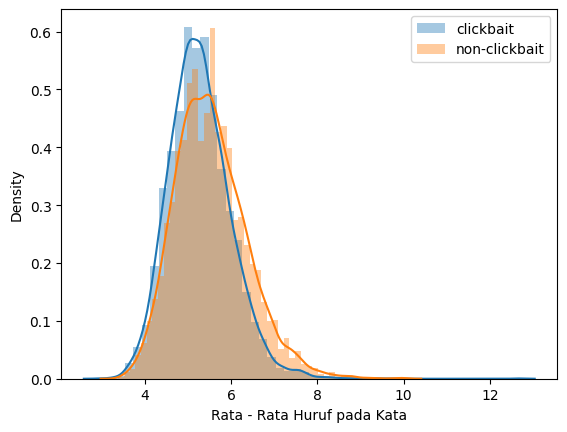

In [ ]:
sns.distplot(df[df['label']=='clickbait']['word_length'],label='clickbait')
sns.distplot(df[df['label']!='clickbait']['word_length'],label='non-clickbait')
plt.xlabel('Rata - Rata Huruf pada Kata')
plt.legend()
plt.show()

Persentasi Stopword

In [ ]:
lemmatizer = Indonesian()
file = open('data/stopwords_id.txt')
text = file.read()
stops=set(text.split())

In [ ]:
from nltk.tokenize import word_tokenize
def stopword_ratio(t,stops = set()):
    listKata = lemmatizer(t.lower().strip())
    num_stops=0
    for token in word_tokenize(str(listKata)):
        if token in stops:
            num_stops+=1
    ratio=num_stops/len(word_tokenize(str(listKata)))
    return ratio

In [ ]:
stopwords_ratio=[]
for i in df['title']:
    stopwords_ratio.append(stopword_ratio(i,stops))
df['Stops_ratio']=stopwords_ratio

In [ ]:
df['Stops_ratio']

0        0.000000
1        0.100000
2        0.181818
3        0.181818
4        0.181818
           ...   
14995    0.166667
14996    0.352941
14997    0.230769
14998    0.272727
14999    0.111111
Name: Stops_ratio, Length: 15000, dtype: float64

In [ ]:
print('Average stopwords percentage of clickbait :',df[df['label']=='clickbait'].Stops_ratio.mean())
print('Average stopwords percentage of non-clickbait :',df[df['label']!='clickbait'].Stops_ratio.mean())

Average stopwords percentage of clickbait : 0.21530806642811462
Average stopwords percentage of non-clickbait : 0.16984645591671682


Text(0.5, 1.0, 'Rata - Rata Persentasi Stopword')

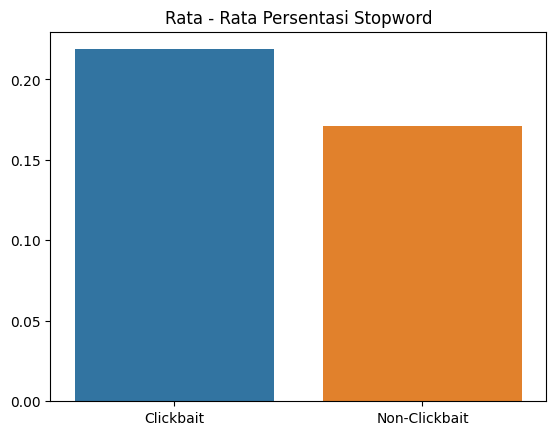

In [ ]:
sns.barplot(x=['Clickbait','Non-Clickbait'],y=[0.2187194092987689,0.1713475361866192])
plt.title('Rata - Rata Persentasi Stopword')

Simbol (Punctuation)

In [ ]:
Unusual_punctuation=[]
for i in df['title']:
    punct=re.findall(r'[\W]',i.replace(' ',''))
    Unusual_punctuation.append(len(punct))

In [ ]:
df['Num_Punctuation']=Unusual_punctuation

Text(0.5, 1.0, 'Jumlah Punktuasi (simbol - simbol)')

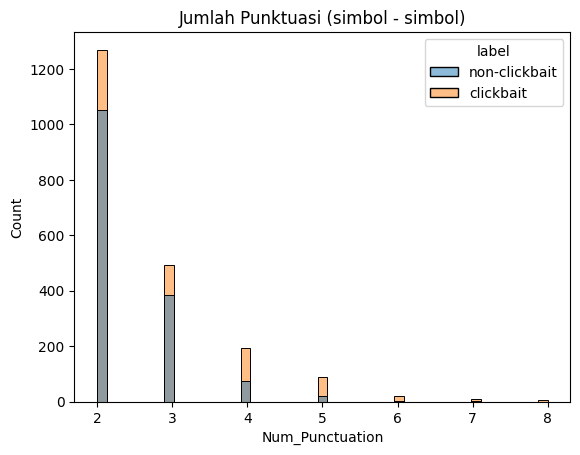

In [ ]:
sns.histplot(data=df[(df['Num_Punctuation']<9)&(df['Num_Punctuation']>1)],x='Num_Punctuation',hue='label')
plt.title('Jumlah Punktuasi (simbol - simbol)')

Text(0.5, 1.0, 'Jumlah Punktuasi (simbol - simbol)')

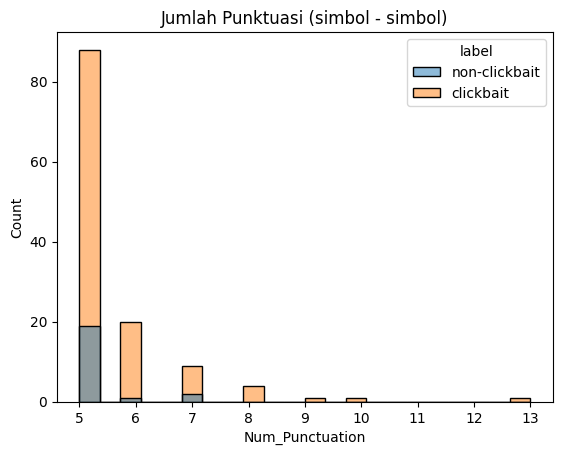

In [ ]:
sns.histplot(data=df[(df['Num_Punctuation']>=5)],x='Num_Punctuation',hue='label')
plt.title('Jumlah Punktuasi (simbol - simbol)')

In [ ]:
punct = df[['Num_Punctuation', 'title', 'label']]
punct = punct.groupby(by=['Num_Punctuation', 'label']).count()
punct = pd.DataFrame(data=punct)
punct.reset_index(inplace=True)
punct = punct.rename(columns = {'title':'jumlah'})
punct

,Num_Punctuation,label,jumlah
0,0,clickbait,1689
1,0,non-clickbait,3831
2,1,clickbait,2517
3,1,non-clickbait,3350
4,2,clickbait,1269
5,2,non-clickbait,1052
6,3,clickbait,493
7,3,non-clickbait,384
8,4,clickbait,194
9,4,non-clickbait,75


In [ ]:
punct1 = punct[(punct.Num_Punctuation <= 6 )]
punct1

,Num_Punctuation,label,jumlah
0,0,clickbait,1689
1,0,non-clickbait,3831
2,1,clickbait,2517
3,1,non-clickbait,3350
4,2,clickbait,1269
5,2,non-clickbait,1052
6,3,clickbait,493
7,3,non-clickbait,384
8,4,clickbait,194
9,4,non-clickbait,75


In [ ]:
fig2 = px.bar(punct1, x='Num_Punctuation', y='jumlah', barmode='group',
              color='label', text_auto=True, title = 'Jumlah Simbol (Punctuation)', width=1100, height=700)

fig2.update_traces(
#    texttemplate='%{y}<br>%{text}',   # use '%{text}' to show only percentage
    textposition='outside'
)

fig2.show()

In [ ]:
punct2 = punct[(punct.Num_Punctuation >= 5 )]
punct2

,Num_Punctuation,label,jumlah
10,5,clickbait,88
11,5,non-clickbait,19
12,6,clickbait,20
13,6,non-clickbait,1
14,7,clickbait,9
15,7,non-clickbait,2
16,8,clickbait,4
17,9,clickbait,1
18,10,clickbait,1
19,13,clickbait,1


In [ ]:
fig3 = px.bar(punct2, x='Num_Punctuation', y='jumlah', barmode='group',
              color='label', text_auto=True, title = 'Jumlah Simbol (Punctuation)', width=1100, height=700)

fig3.update_traces(
#    texttemplate='%{y}<br>%{text}',   # use '%{text}' to show only percentage
    textposition='outside'
)

fig3.show()

Kategori dan Sumber

In [ ]:
df['category']=df.category.apply(lambda x:x.title())

In [ ]:
df.category.unique()

array(['Detiknews', 'Parenting', 'Lifestyle', 'News & Entertainment',
       'Beauty', 'Selebriti', 'Korea', 'Film Internasional',
       'Film Indonesia', 'Sinetron', 'Hollywood', 'Televisi', 'News',
       'Bola', 'Entertainment', 'Money', 'Tekno', 'Otomotif', 'Sains',
       'Properti', 'Travel', 'Bisnis', 'Showbiz', 'Global', 'Regional',
       'Health', 'Haji', 'Celebrity', 'Sports', 'Economy', 'Muslim',
       'Techno', 'Berita Viral', 'Nasional', 'Teknologi', 'Berita Utama',
       'Berita Sumut', 'Medan Bung', 'Kriminal', 'Pendidikan',
       'Internasional', 'Kesehatan', 'Dahlan Iskan', 'Medan Update',
       'Ekonomi', 'Hiburan', 'Pariwisata', 'Kisah Nyata', 'Acit Nai',
       'Ragam', 'Humor Medan', 'Ihram', 'Sepak Bola', 'Khazanah',
       'Oto Tek', 'Leisure', 'Kolom', 'English', 'Retizen', 'Beacukai',
       'Konsultasi', 'Mpr Ri', 'Sastra', 'Daerah', 'Metro', 'Autotekno',
       'International', 'Ekbis', 'Sport', 'Cantik', 'Dunia', 'Gaya',
       'Seleb', 'Event', 'Difab

In [ ]:
cc_clickbait=Counter(df[df.label=='clickbait'].category)

In [ ]:
def cat_1(x):
    Selebriti=['Selebriti','Seleb','Celebrity','News & Entertainment','Hollywood','Entertainment','Showbiz','Hiburan','Leisure','Musik'
              ,'Film','Film Internasional','Film Indonesia','Korea', 'Sinetron','Tv','Televisi']
    Ekbis=['Ekbis','Bisnis','Economy','Ekonomi','Money','Properti']
    Olahraga=['Sport','Bola','Sports','Sepak Bola','Super Skor']
    Otomotif=['Otomotif','Oto Tek','Autotekno']
    Tekno=['Tekno','Techno','Creativelab']
    Lifestyle=['Cantik','Beauty','Pariwisata','Gaya','Kalbe Health Corner','Health','Humor Medan','Ragam','Sains','Kesehatan']
    Umum=['Regional','Pertamina','Kolom','Event','Difabel','Metropolitan','News','Medan Update','Daerah','Berita Viral','Berita Utama',
            'Berita Sumut','Medan Bung','Retizen','Internasional','Dunia','International','Global','Australia Plus','Nasional','Detiknews','Dpd Ri','Dpr Ri','Dahlan Iskan','Mpr Ri','Kilas Kementerian','Fokus','Metro','Tribunners'
           ,'Kriminal','English']
    Religi =['Haji','Muslim','Ihram', 'Khazanah']
    Lain=['Acit Nai','Kisah Nyata','Serbaserbi','Sastra','Beacukai','Bea Cukai','Kuliner','Travel','Pendidikan','Parenting','Konsultasi']
    if x in Selebriti:
        x='Selebriti&Entertainment'
    elif x in Ekbis:
        x='Ekonomi&Bisnis'
    elif x in Olahraga:
        x='Olahraga'
    elif x in Otomotif:
        x='Otomotif'
    elif x in Tekno:
        x='Teknologi'
    elif x in Lifestyle:
        x='Lifestyle'
    elif x in Umum:
        x='Umum'
    elif x in Religi:
        x='Religi'
    elif x in Lain:
        x='Lain'
    return x

In [ ]:
df['category_label']=df.category.apply(lambda x:cat_1(x))

In [ ]:
kategori = df[['title', 'label','category_label']].groupby(by=['category_label', 'label']).count()
kategori = pd.DataFrame(data=kategori)
kategori.reset_index(inplace=True)
kategori = kategori.rename(columns = {'title':'jumlah'})
kategori

,category_label,label,jumlah
0,Ekonomi&Bisnis,clickbait,380
1,Ekonomi&Bisnis,non-clickbait,1084
2,Lain,clickbait,145
3,Lain,non-clickbait,71
4,Lifestyle,clickbait,753
5,Lifestyle,non-clickbait,341
6,Olahraga,clickbait,620
7,Olahraga,non-clickbait,1107
8,Otomotif,clickbait,166
9,Otomotif,non-clickbait,240


In [ ]:
fig4 = px.bar(kategori, x='category_label', y='jumlah', barmode='group',
              color='label', text_auto=True, title = 'Jumlah setaip label berdasarkan kategori', width=1100, height=700)

fig4.update_traces(
#    texttemplate='%{y}<br>%{text}',   # use '%{text}' to show only percentage
    textposition='outside'
)

fig4.show()

In [ ]:
sumber = df[['title', 'label','source']].groupby(by=['source', 'label']).count()
sumber = pd.DataFrame(data=sumber)
sumber.reset_index(inplace=True)
sumber = sumber.rename(columns = {'title':'jumlah'})
sumber

,source,label,jumlah
0,Kompas.com,clickbait,343
1,Kompas.com,non-clickbait,1157
2,detik.com,clickbait,106
3,detik.com,non-clickbait,894
4,fimela.com,clickbait,394
5,fimela.com,non-clickbait,306
6,kapanlagi.com,clickbait,397
7,kapanlagi.com,non-clickbait,603
8,liputan6.com,clickbait,887
9,liputan6.com,non-clickbait,613


In [ ]:
fig5 = px.bar(sumber, x='source', y='jumlah', barmode='group',
              color='label', text_auto=True, title = 'Jumlah setiap label berdasarkan sumber', width=1100, height=700)

fig5.update_traces(
#    texttemplate='%{y}<br>%{text}',   # use '%{text}' to show only percentage
    textposition='outside'
)

fig5.show()

WordCloud Keseluruhan Data

In [ ]:
def ngrams(data,n):
    text = " ".join(data)
    words = nltk.word_tokenize(text)
    ngram = list(nltk.ngrams(words,n))
    return ngram

In [ ]:
unigram = ngrams(df['title_cleaned'],1)

In [ ]:
with open('bigram.txt', 'w') as f:
  f.write('\n'.join(bigram))

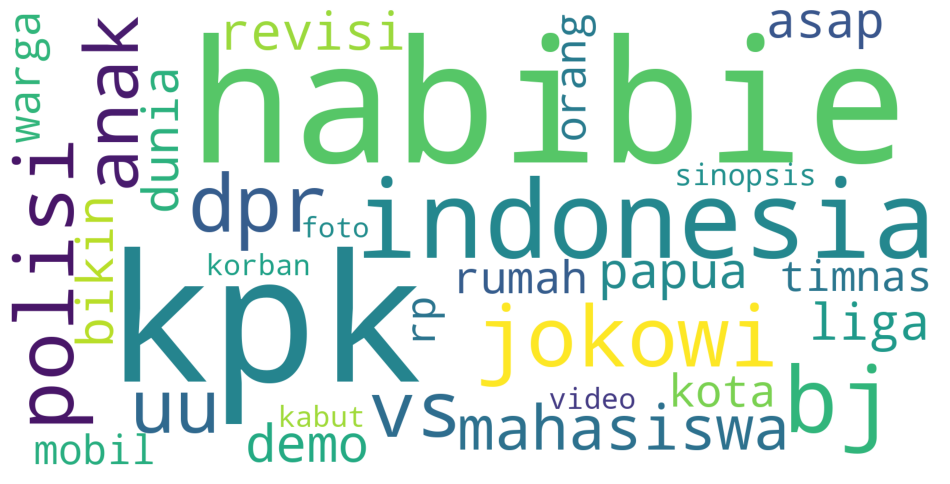

In [ ]:
for i in range(0,len(unigram)):
  unigram[i] = "_".join(unigram[i])

unigram_freq = nltk.FreqDist(unigram)
unigram_wordcloud = WordCloud(background_color='white',mode='RGB', width=1600, height=800, max_words=30).generate_from_frequencies(unigram_freq)
plt.figure(figsize=(12,8))
plt.imshow(unigram_wordcloud)
plt.axis("off")
plt.show()

In [ ]:
bigram = ngrams(df['title_cleaned'],2)

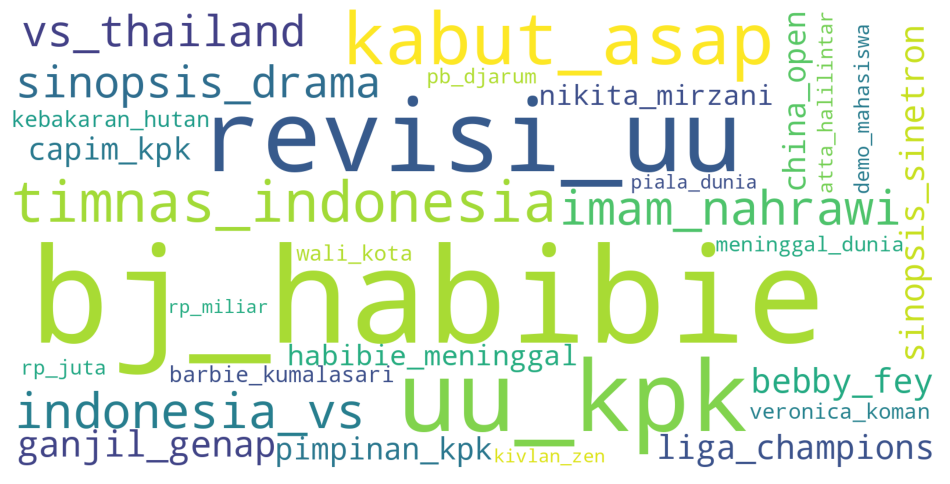

In [ ]:
for i in range(0,len(bigram)):
  bigram[i] = "_".join(bigram[i])

bigram_freq = nltk.FreqDist(bigram)
bigram_wordcloud = WordCloud(background_color='white',mode='RGB', width=1600, height=800, max_words=30).generate_from_frequencies(bigram_freq)
plt.figure(figsize=(12,8))
plt.imshow(bigram_wordcloud)
plt.axis("off")
plt.show()

WordCloud Clickbait

In [ ]:
clb = df[df['label'].isin(['clickbait'])]
unigram_clb = ngrams(clb['title_cleaned'],1)

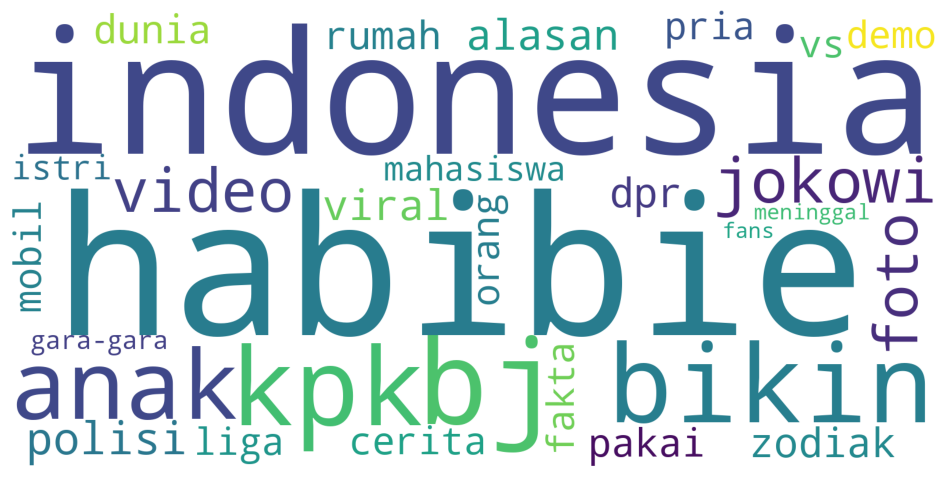

In [ ]:
for i in range(0,len(unigram_clb)):
  unigram_clb[i] = "_".join(unigram_clb[i])

unigram_freq = nltk.FreqDist(unigram_clb)
unigram_wordcloud = WordCloud(background_color='white',mode='RGB', width=1600, height=800, max_words=30).generate_from_frequencies(unigram_freq)
plt.figure(figsize=(12,8))
plt.imshow(unigram_wordcloud)
plt.axis("off")
plt.show()

In [ ]:
bigram_clb = ngrams(clb['title_cleaned'],2)

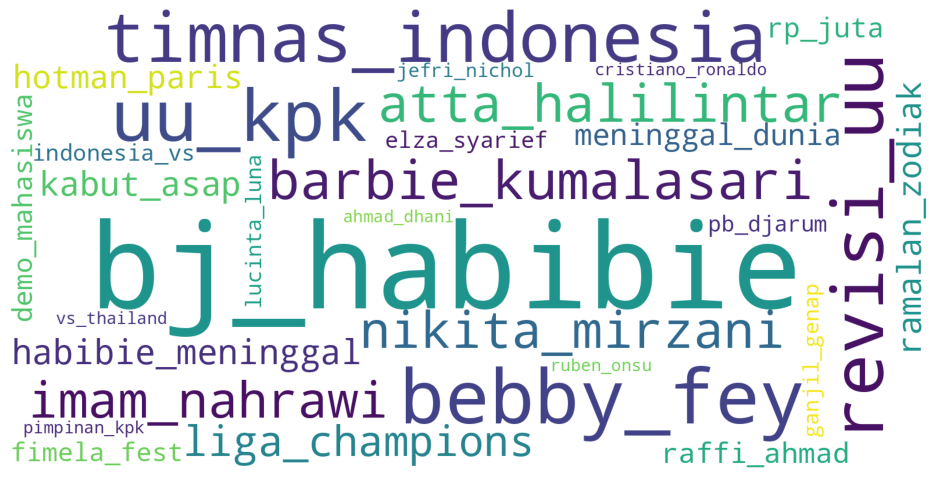

In [ ]:
for i in range(0,len(bigram_clb)):
  bigram_clb[i] = "_".join(bigram_clb[i])

bigram_freq = nltk.FreqDist(bigram_clb)
bigram_wordcloud = WordCloud(background_color='white',mode='RGB', width=1600, height=800, max_words=30).generate_from_frequencies(bigram_freq)
plt.figure(figsize=(12,8))
plt.imshow(bigram_wordcloud)
plt.axis("off")
plt.show()

WordCloud Non-Clickbait

In [ ]:
nclb = df[df['label'].isin(['non-clickbait'])]
unigram_nclb = ngrams(nclb['title_cleaned'],1)

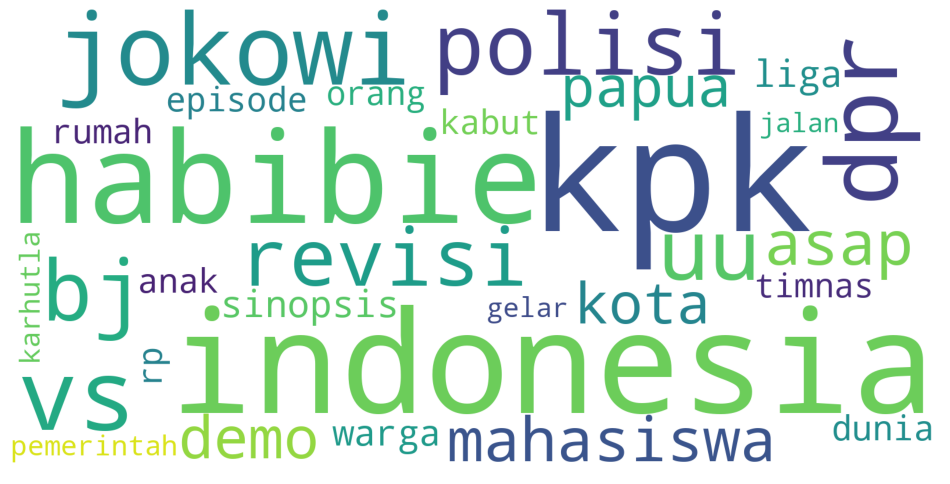

In [ ]:
for i in range(0,len(unigram_nclb)):
  unigram_nclb[i] = "_".join(unigram_nclb[i])

unigram_freq = nltk.FreqDist(unigram_nclb)
unigram_wordcloud = WordCloud(background_color='white',mode='RGB', width=1600, height=800, max_words=30).generate_from_frequencies(unigram_freq)
plt.figure(figsize=(12,8))
plt.imshow(unigram_wordcloud)
plt.axis("off")
plt.show()

In [ ]:
bigram_nclb = ngrams(nclb['title_cleaned'],2)

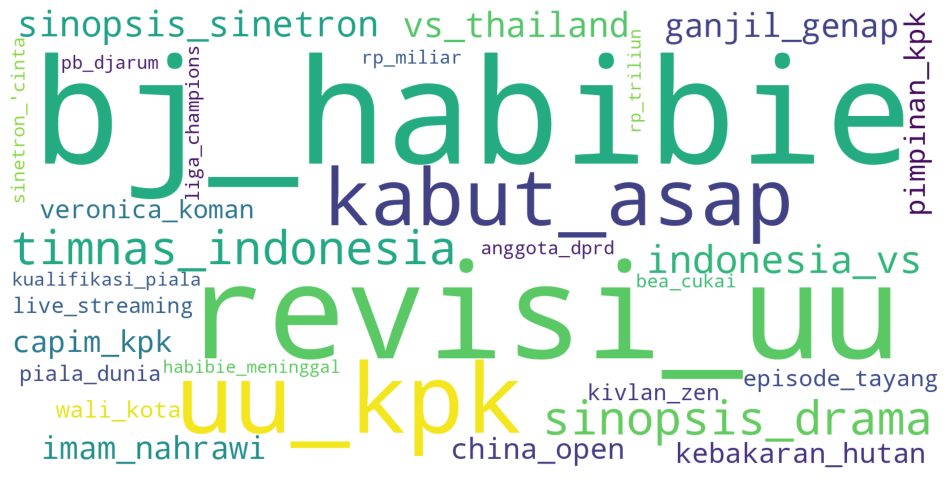

In [ ]:
for i in range(0,len(bigram_nclb)):
  bigram_nclb[i] = "_".join(bigram_nclb[i])

bigram_freq = nltk.FreqDist(bigram_nclb)
bigram_wordcloud = WordCloud(background_color='white',mode='RGB', width=1600, height=800, max_words=30).generate_from_frequencies(bigram_freq)
plt.figure(figsize=(12,8))
plt.imshow(bigram_wordcloud)
plt.axis("off")
plt.show()